In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.interpolate as sinterp

In [2]:
x = np.arange(-20, 20, 0.1)
t = np.arange(0, 10, 0.1)


Characteristics are described by the parametric eqaution $dt/ds = 1$ and $dx/ds = u+c$, and $u+2c = u_0 + 2 c_0$ along the characteristic defined by s.  Note that the negative charactersitics are defined by straight lines so that $x/t = u - c$, so we have two equations for two unknowns for $u$ and $c$ and
$u = \frac{2}{3}(c_0 + \frac{x}{t})$ and $c = \frac{1}{3}(2 c_0 - x/t)$

In [116]:
t0 = 0
ds = 0.001
N = 1000
x = np.arange(-10, 10, 0.01) 
u = np.zeros(len(x))
c = 0.1 - x * 0.9 / 2.5
c[x>0] = 0.1
c[x<-2.5] = 1
c = c*10

u0 = u.copy()
c0 = c.copy()
uu = [1, 1, 0, 0]
xx = [-1000, -2.5, 0, 1000]
u0 = np.interp(x, xx, uu)

U  = np.zeros((N, len(x)))
C  = np.zeros((N, len(x)))

t = np.linspace(0, 1, N)
dt = np.median(np.diff(t))
Rpn = u0 + 2 * c0
Rmn = u0 - 2 * c0
C[0, :] = c0
U[0, :] = u0
for n in range(1, N):
    xpn = x + dt * (u + c)
    xmn = x + dt * (u - c)
    # regrid on the grid points via linear approx
    Rpn = np.interp(x, xpn, Rpn)
    Rmn = np.interp(x, xmn, Rmn)
    u = (Rpn + Rmn) / 2
    c = (Rpn - Rmn) / 4
    U[n,:] = u
    C[n,:] = c

g = 9.81

<IPython.core.display.Javascript object>


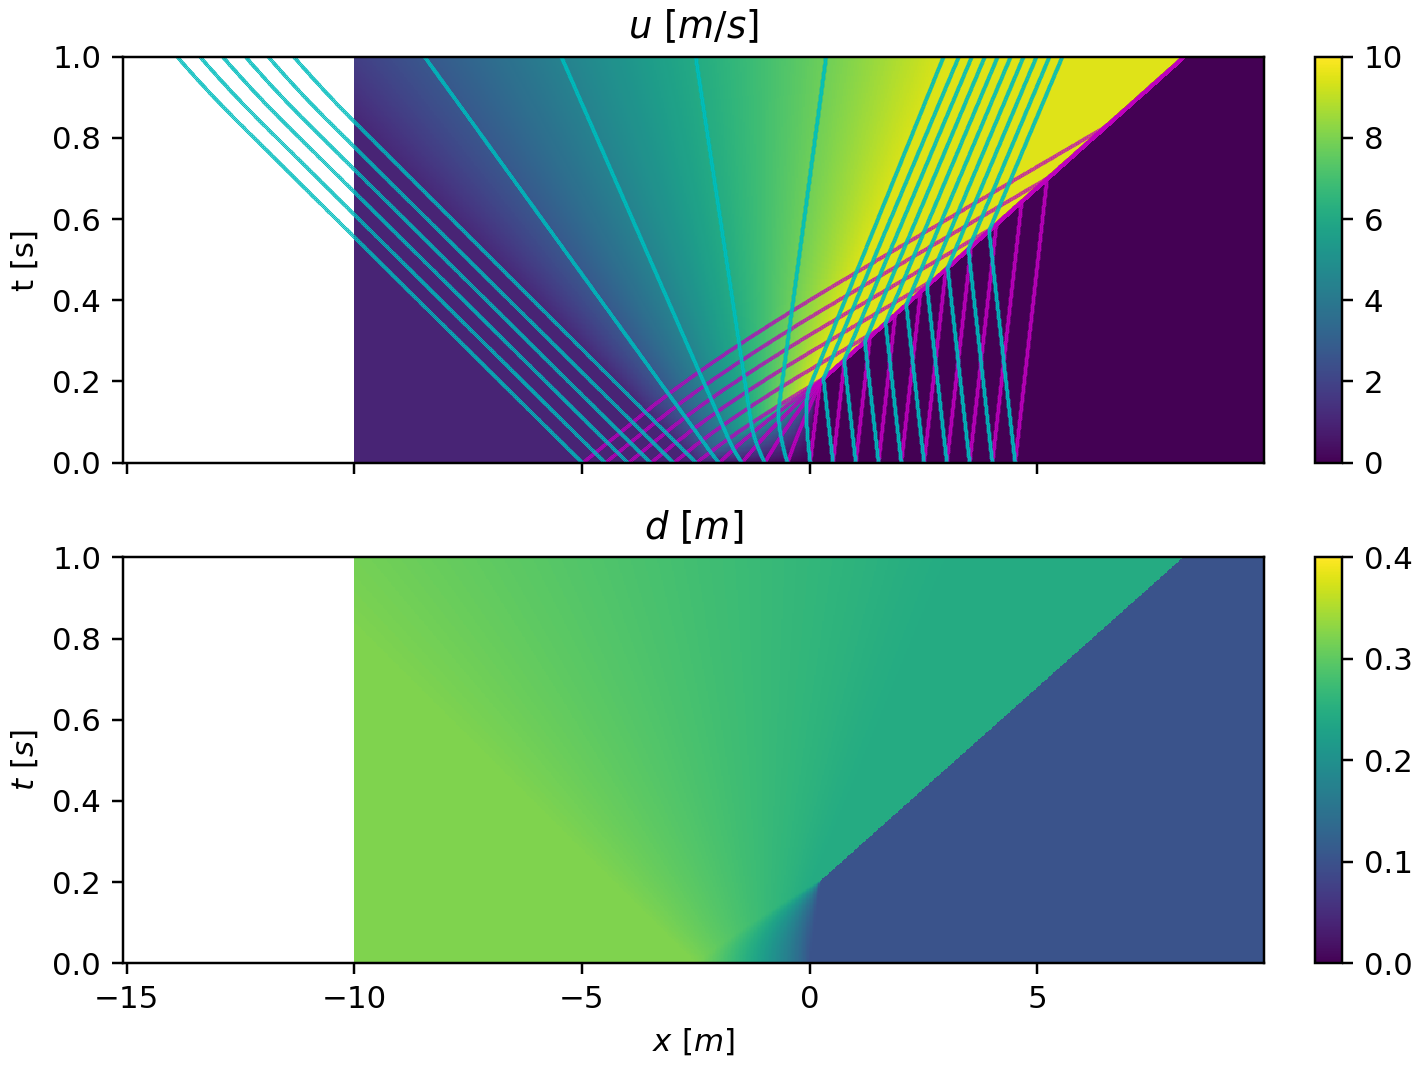

[10.  10.   8.2  6.4  4.6  2.8  1.   1. ]


In [134]:
fig, ax = plt.subplots(2, 1, constrained_layout=True, sharex=True)

pc = ax[0].pcolormesh(x[::3], t[::3], U[::3,::3], rasterized=True, vmin=0.0, vmax=10)
ax[0].set_ylabel('t [s]')
ax[0].set_title('$u\ [m/s]$')
fig.colorbar(pc, ax=ax[0])

# plot some characteristics...
xx = np.arange(-5, 5, 0.5)
for i in range(len(t)):
    ax[0].plot(xx, t[i] + 0 * xx, 'm.', ms=0.2)
    u = np.interp(xx, x, U[i,:])
    c = np.interp(xx, x, C[i,:])
    xx = xx + dt * (u + c)

xx = np.arange(-5, 5, 0.5)
for i in range(len(t)):
    ax[0].plot(xx, t[i] + 0 * xx, 'c.', ms=0.2)
    u = np.interp(xx, x, U[i,:])
    c = np.interp(xx, x, C[i,:])
    xx = xx + dt * (u - c)

# plot the theoretical curves...
xx = np.arange(-3, 1, 0.5)
c = np.interp(xx, x, C[0,:])
print(c)
if 0:
    for nn, x0 in enumerate(xx):
    
        slope = (3 * c[nn] - 2 * C[0, -2])
        print(slope, c[-1])
        ax[0].plot(t  * slope + x0 , t, 'k')

# slope = 2
# ax[0].plot(t  * slope + x0 , t, 'k')
        
pc = ax[1].pcolormesh(x[::3], t[::3], np.sqrt(C[::3,::3])/g, rasterized=True, vmin=0, vmax=0.4)
ax[1].set_ylabel('$t\ [s]$')
ax[1].set_xlabel('$x\ [m]$')
fig.colorbar(pc, ax=ax[1])
ax[1].set_title('$d\ [m]$')
fig.savefig('VerySlowInitialSpeedPcolor.png')

<IPython.core.display.Javascript object>


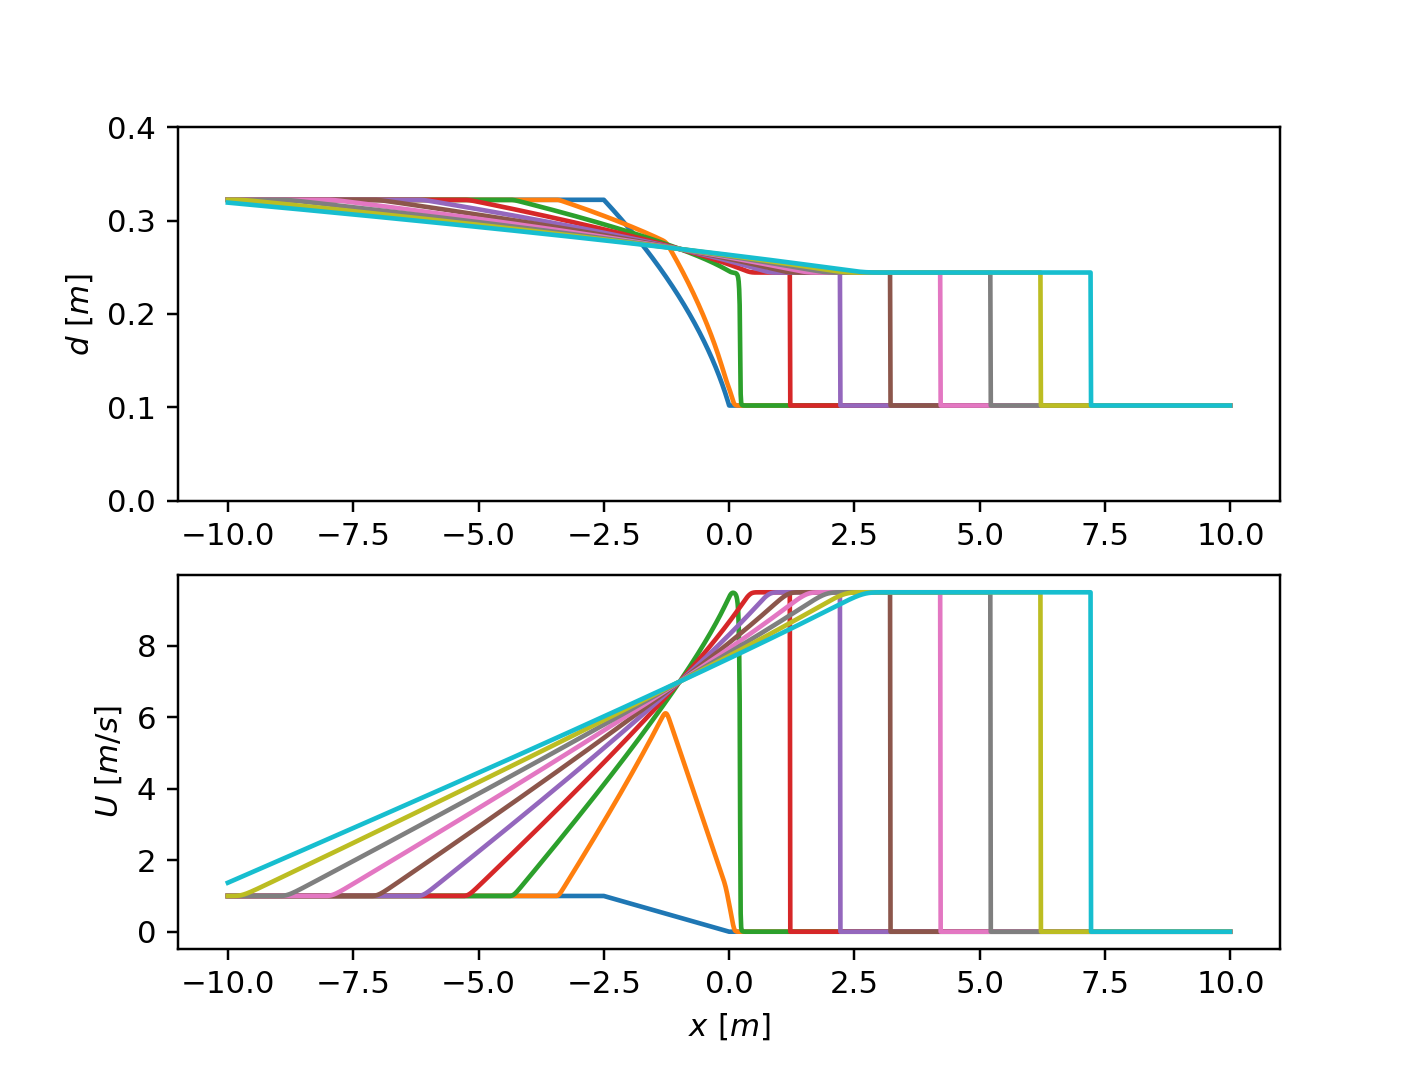

In [135]:
fig, axs = plt.subplots(2,1)
ax = axs[0]
ax.plot(x, np.sqrt(C)[::100,:].T/g)
ax.set_ylabel('$d\ [m]$')
ax.set_ylim([0, 0.4])
ax = axs[1]
ax.set_ylabel('$U\ [m/s] $')
ax.plot(x, U[::100,:].T)
ax.set_xlabel('$x\ [m]$')
fig.savefig('VerySlowInitialSpeedLines.pdf')